<a href="https://colab.research.google.com/github/Sinudeshmukh/Data-Science/blob/main/LinearRegressionP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Libraries

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

##Load Data

In [ ]:
df = pd.read_csv("ecommerce_client.csv")
df.head()

,e-mail,address,membership_image,mean_session_length,time_spent_app,time_spent_website,length_of_membership,annual_amount_spent
0,jessica04@christian-riley.com,"338 Graham Loaf Suite 236\nEast Toddton, FM 43...",LemonChiffon,34.497268,12.655651,39.577668,4.082621,587.951054
1,simmonsmartin@hardy.com,"2302 Joshua Park\nMillerbury, WA 30239-8144",MediumVioletRed,31.926272,11.109461,37.268959,2.664034,392.204933
2,michellejohnson@sanders-rodriguez.com,"70562 Gonzalez Stravenue\nElizabethland, WI 40...",Teal,33.000915,11.330278,37.110597,4.104543,487.547505
3,tylerhernandez@barton.info,"7613 Miguel Knoll Suite 762\nWest Katherine, W...",SlateGray,34.305557,13.717514,36.721283,3.120179,581.852344
4,connerjoseph@gmail.com,"981 David Square\nNew Jacquelinetown, AK 66018...",Turquoise,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   e-mail                500 non-null    object 
 1   address               500 non-null    object 
 2   membership_image      500 non-null    object 
 3   mean_session_length   500 non-null    float64
 4   time_spent_app        500 non-null    float64
 5   time_spent_website    500 non-null    float64
 6   length_of_membership  500 non-null    float64
 7   annual_amount_spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 35.2+ KB


In [ ]:
df.describe()

,mean_session_length,time_spent_app,time_spent_website,length_of_membership,annual_amount_spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


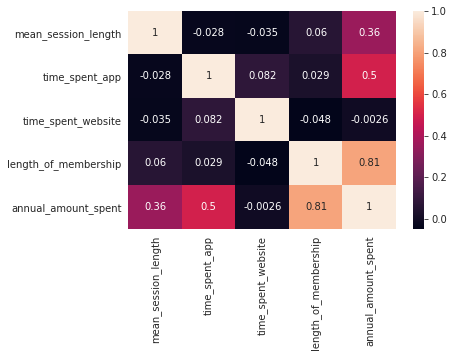

In [ ]:
sns.heatmap(df.corr(),annot=True)

##Visualizations

In [ ]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

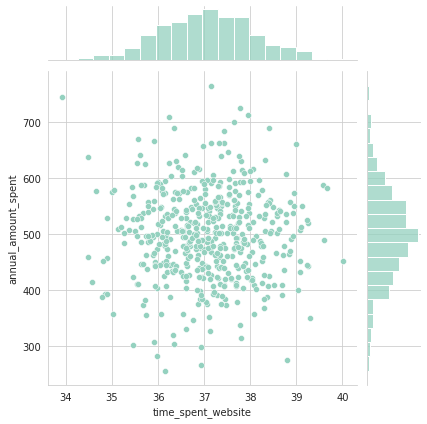

In [ ]:
sns.jointplot(x="time_spent_website",y="annual_amount_spent",data=df)

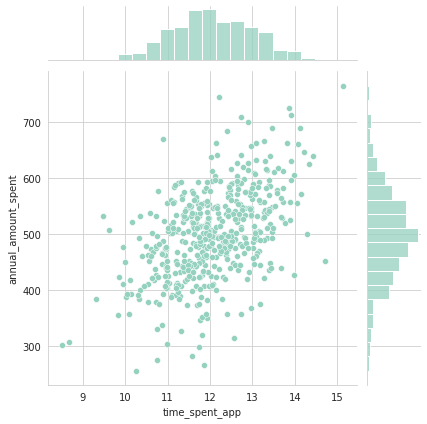

In [ ]:
sns.jointplot(x="time_spent_app",y="annual_amount_spent",data=df)

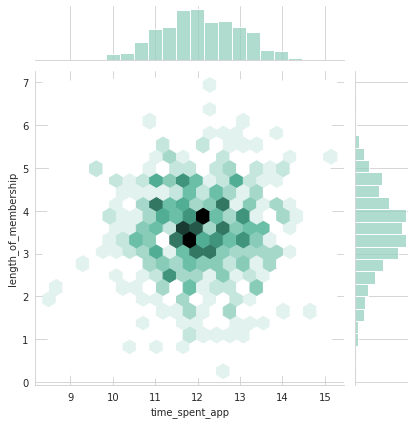

In [ ]:
sns.jointplot(x='time_spent_app',y='length_of_membership',kind='hex',data=df)

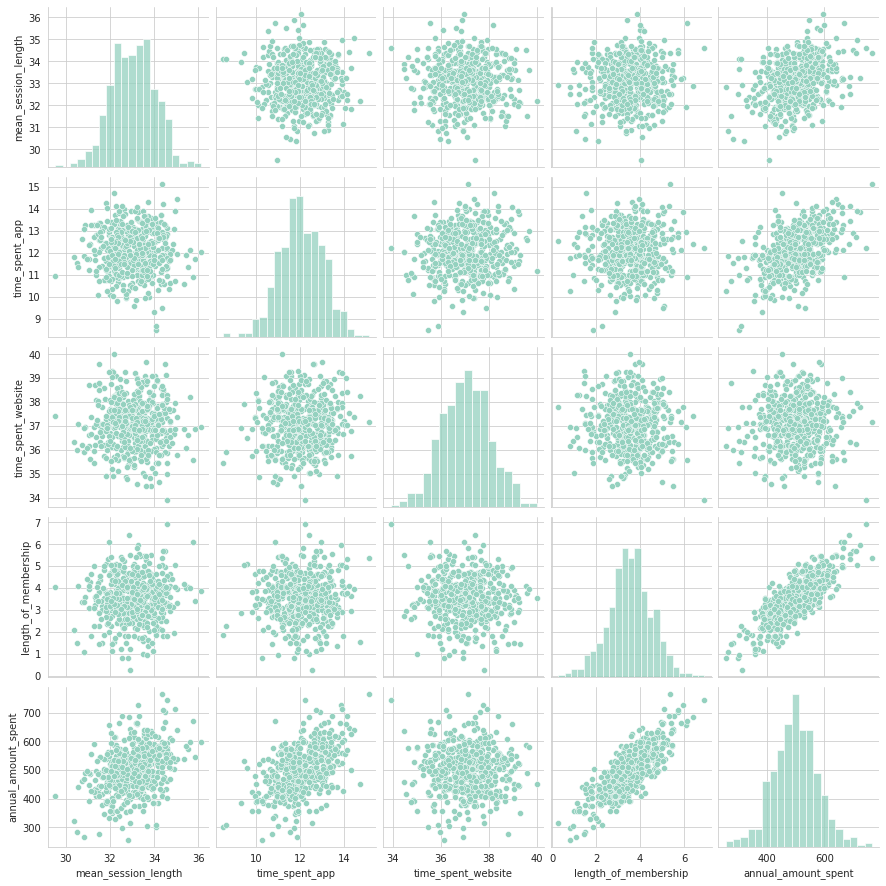

In [ ]:
sns.pairplot(df)

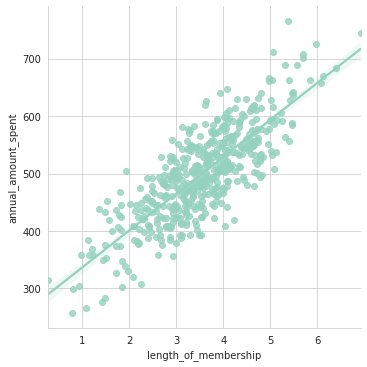

In [ ]:
sns.lmplot(x='length_of_membership',y='annual_amount_spent',data=df)

##Assigning X and Y Variable

In [ ]:
x = df.drop(columns=['annual_amount_spent','e-mail',"membership_image",'address'])
y = df['annual_amount_spent']

##Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

##Model Building

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.intercept_

-1050.653674664572

In [ ]:
model.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

##Predict Model

In [ ]:
y_pred = model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


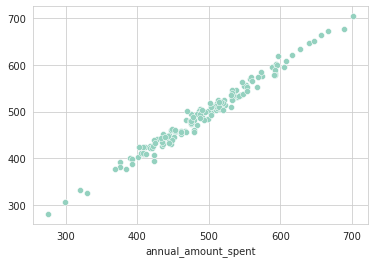

In [ ]:
sns.scatterplot(y_test,y_pred)

##Evaluating the Model

In [ ]:
from sklearn import metrics

##Mean Absolute Error

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

8.426091641432063

##Mean Squared Error

In [ ]:
metrics.mean_squared_error(y_test,y_pred)

103.91554136503264

##Root Mean Squared Error


In [ ]:
metrics.mean_squared_error(y_test,y_pred,squared=False)

10.193897260863121

##Analysing Residuals

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


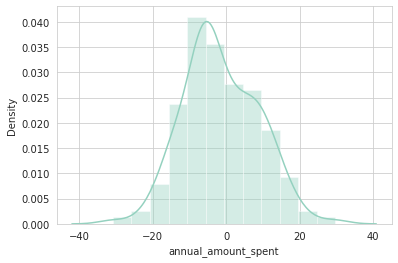

In [ ]:
sns.distplot(y_test-y_pred)

###Residuals are almost normally distributes so our model is good model

##DataFrame for Coefficiants

In [ ]:
x.columns

Index(['mean_session_length', 'time_spent_app', 'time_spent_website',
       'length_of_membership'],
      dtype='object')

In [ ]:
coef = pd.DataFrame(model.coef_,index=['mean_session_length', 'time_spent_app', 'time_spent_website','length_of_membership'],columns=['Coeffecient'])
coef

,Coeffecient
mean_session_length,25.724256
time_spent_app,38.597135
time_spent_website,0.459148
length_of_membership,61.674732


###We can See that time spend on Mobile App has significantly large value than that of time spent on website so we can suggest the company to focus on mobile app development